# Internet Speed Prediction
This notebook analyzes internet speed using Decision Tree, Random Forest, and SVM models.

In [1]:

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
    

## Load the Dataset

In [2]:
data = pd.read_csv("internet.csv")

In [3]:
data.head()

,Ping_latency,Download_speed,Upload_speed,Packet_loss_rate,Router_distance,Network_congestion,ISP_quality,Connection_type_DSL,Connection_type_Cable,Connection_type_Fiber,Signal_strength,Weather_conditions,Internet_speed
0,21.854305,42.395374,19.934759,0.999340,7.569985,1.369483,7.467012,0.000000,0.0,0.000000,76.190258,2.552049,730.336287
1,47.782144,49.976388,17.979781,1.493494,2.660608,1.243015,6.215047,2.373401,0.0,3.869607,70.945684,2.788454,994.148168
2,37.939727,86.182002,10.455388,1.125334,4.119757,3.416768,9.751490,1.509861,0.0,2.332773,83.994324,3.098587,2551.867438
3,31.939632,37.300417,31.148800,0.166605,6.969526,4.864465,4.532849,0.000000,0.0,1.608198,92.278904,4.479742,621.336539
4,12.020839,87.616720,24.877960,0.371160,5.338804,3.010885,7.114995,1.241954,0.0,2.693502,80.535702,4.190802,2612.315499


## Data Preprocessing

In [4]:
data.shape

(5000, 13)

In [5]:
data.describe()

,Ping_latency,Download_speed,Upload_speed,Packet_loss_rate,Router_distance,Network_congestion,ISP_quality,Connection_type_DSL,Connection_type_Cable,Connection_type_Fiber,Signal_strength,Weather_conditions,Internet_speed
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,27.357440,51.691277,26.066003,1.015369,5.578994,2.965295,6.504300,1.272947,1.256751,1.273640,84.948302,2.499880,1257.296163
std,13.033514,27.133568,13.956951,0.575612,2.598671,1.138216,2.018279,1.637940,1.625825,1.631132,8.609663,1.438197,927.617450
min,5.000524,5.005019,2.007572,0.000505,1.000433,1.000441,3.000039,0.000000,0.000000,0.000000,70.001406,0.003471,80.606669
25%,15.973826,28.478861,13.864032,0.525459,3.330062,1.988582,4.732669,0.000000,0.000000,0.000000,77.742714,1.244065,430.808067
50%,27.500388,51.167300,25.817462,1.024899,5.620063,2.963910,6.513309,0.032340,0.002561,0.031585,84.822169,2.511349,1018.976847
75%,38.664539,74.670302,38.509712,1.502211,7.819270,3.928608,8.237586,2.537834,2.507974,2.547957,92.345908,3.771796,1951.295923
max,49.987295,99.952993,49.990647,1.999850,9.999109,4.998928,9.998526,4.999453,4.999785,4.998248,99.998191,4.998094,3364.871190


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Ping_latency           5000 non-null   float64
 1   Download_speed         5000 non-null   float64
 2   Upload_speed           5000 non-null   float64
 3   Packet_loss_rate       5000 non-null   float64
 4   Router_distance        5000 non-null   float64
 5   Network_congestion     5000 non-null   float64
 6   ISP_quality            5000 non-null   float64
 7   Connection_type_DSL    5000 non-null   float64
 8   Connection_type_Cable  5000 non-null   float64
 9   Connection_type_Fiber  5000 non-null   float64
 10  Signal_strength        5000 non-null   float64
 11  Weather_conditions     5000 non-null   float64
 12  Internet_speed         5000 non-null   float64
dtypes: float64(13)
memory usage: 507.9 KB


### Missing Values

In [7]:
print("Missing values in the dataset:")
data.isnull().sum()

Missing values in the dataset:


Ping_latency             0
Download_speed           0
Upload_speed             0
Packet_loss_rate         0
Router_distance          0
Network_congestion       0
ISP_quality              0
Connection_type_DSL      0
Connection_type_Cable    0
Connection_type_Fiber    0
Signal_strength          0
Weather_conditions       0
Internet_speed           0
dtype: int64

Theres no missing values in the dataset.

####  Seperate Categorical and Numerical Columns

In [8]:
categoricals = data.select_dtypes(include=['object']).columns.tolist()
numericals = data.select_dtypes(include=['int64', 'float64']).columns.tolist()
categoricals, numericals

([],
 ['Ping_latency',
  'Download_speed',
  'Upload_speed',
  'Packet_loss_rate',
  'Router_distance',
  'Network_congestion',
  'ISP_quality',
  'Connection_type_DSL',
  'Connection_type_Cable',
  'Connection_type_Fiber',
  'Signal_strength',
  'Weather_conditions',
  'Internet_speed'])

#### Remove Outliers

In [9]:
def remove_outliers_iqr(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)  
        Q3 = df[col].quantile(0.75)  
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

In [10]:
data = remove_outliers_iqr(data, numericals)
print("New dataset shape:", data.shape)    

New dataset shape: (5000, 13)


## Feature Scaling and Splitting Data

In [11]:
X = data.drop(columns=['Internet_speed'])  
y = data['Internet_speed']  
numericals.remove('Internet_speed')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train[numericals] = scaler.fit_transform(X_train[numericals])
X_test[numericals]  = scaler.transform(X_test[numericals])
    

# Model Training

### Decision Tree Model

In [12]:
dt_model = DecisionTreeRegressor(max_depth=10, random_state=62)
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)
    

### Random Forest Model

In [13]:
rf_model = RandomForestRegressor(n_estimators=250, max_depth=10, random_state=33)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)


### SVM Model

In [14]:
svm_model = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.01)
svm_model.fit(X_train, y_train)
svm_pred = svm_model.predict(X_test)

## Model Evaluation

In [15]:
def evaluate_model(name, y_test, y_pred):
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"{name} Performance:")
    print(f"MSE: {mse:.4f}, MAE: {mae:.4f}, R²: {r2:.4f}\n")

In [16]:
evaluate_model("Decision Tree", y_test, dt_pred)
evaluate_model("Random Forest", y_test, rf_pred)
evaluate_model("SVM", y_test, svm_pred)

Decision Tree Performance:
MSE: 894.4619, MAE: 23.8595, R²: 0.9990

Random Forest Performance:
MSE: 475.2970, MAE: 17.4905, R²: 0.9995

SVM Performance:
MSE: 34496.1927, MAE: 112.5188, R²: 0.9601



## Visualization of Results

In [17]:
sorted_idx = np.argsort(y_test.values)
y_test_sorted = y_test.values[sorted_idx]
dt_pred_sorted = dt_pred[sorted_idx]
rf_pred_sorted = rf_pred[sorted_idx]
svm_pred_sorted = svm_pred[sorted_idx]    

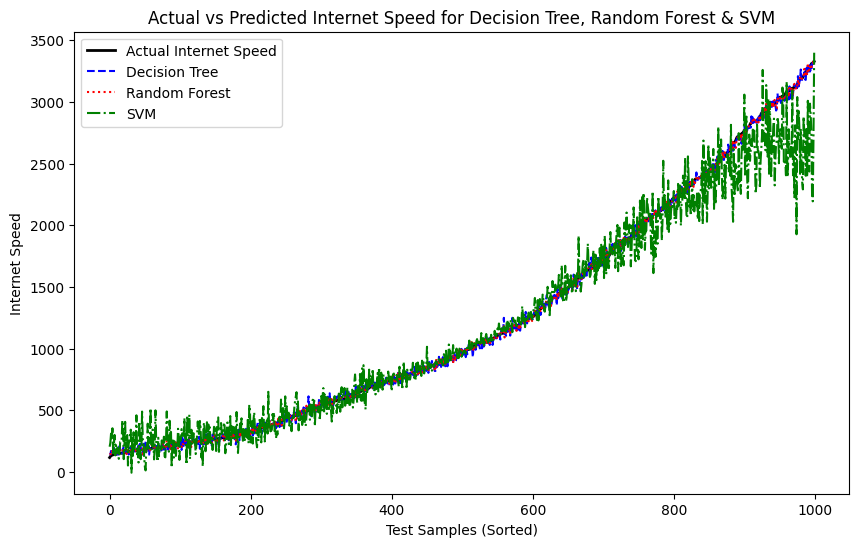

In [18]:
plt.figure(figsize=(10, 6))
plt.plot(y_test_sorted, label="Actual Internet Speed", color="black", linestyle="-", linewidth=2)
plt.plot(dt_pred_sorted, label="Decision Tree", color="blue", linestyle="--")
plt.plot(rf_pred_sorted, label="Random Forest", color="red", linestyle=":")
plt.plot(svm_pred_sorted, label="SVM", color="green", linestyle="-.")

plt.xlabel("Test Samples (Sorted)")
plt.ylabel("Internet Speed")
plt.title("Actual vs Predicted Internet Speed for Decision Tree, Random Forest & SVM")
plt.legend()
plt.show()